## pyKO Test 15
### Steinberg-Guinan strength with Mie Gruneisen plates Al -> Cu at 1000 m/s, planar, free surfaces


Sarah T. Stewart<br>
July 5, 2023 -- very beta SG model implementation v0.6.x-dev

In [1]:
# import the same set of modules for each test run provided with pyKO
%run import-modules

Platform:  Darwin Kernel Version 22.5.0: Thu Jun  8 22:21:34 PDT 2023; root:xnu-8796.121.3~7/RELEASE_ARM64_T8112
python version:  3.11.4
matplotlib version:  3.7.1
hvplot version:  0.8.4
numpy version:  1.25.0
pandas version:  2.0.2
pickle version:  4.0
yaml version:  6.0
pint version:  0.22
pyko version:  v0.6.x-dev-2023-07-05

/usr/local/bin/gfortran

GNU Fortran (GCC) 12.1.0
Copyright (C) 2022 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.




## Check the input file


In [2]:
# path to the input file
filein = './test15/test15-SG-strength.yml'

# initialize the run class variable by loading the configuration file
run = RunClass(fin=filein)
# print the run class state; this will print in code units
run.checkinput()
# the output filename is run.outputfilename


pyKO v0.6.x-dev-2023-07-05 run parameters
   All outputs are in code units 
   Input file: ./test15/test15-SG-strength.yml 
   Output file: ./test15/pyko-test15-SG-strength-bin.dat 
   Number of materials: 2 
   Number of nodes in each material: [200 300] 
   Length of each material: [0.2 0.3] 
   Initial left edge of each material: [-0.2  0. ] 
   Boundary conditions: ['FREE', 'FREE']
   Material EOS:     ['MGR', 'MGR'] 
   Geometry:         PLA 
   Gravity:          0.0 
   Void pressure:    1e-09 
   Time step factor: 6 
   Stop time:        1.0

mat1 Steinberg-Guinan parameters [code units]: 
   Yield stress: 0.0029000000000000002 
   Max yield stress: 0.0068000000000000005 
   beta:             125.0 
   n:                0.1 
   b:                8.0 
   h:                0.00062 
   Melt temperature: 1220.0 
   Shear modulus:    0.276 
   g0 (from EOS):    2.0 


mat1 Fracture parameters [code units]: 
   Fracture is turned on:                       True 
   Fracture pressure: 

### Run python KO

Fortan version uses an initial time step of 0.001 microseconds; set as input here for code comparison.

Otherwise pyKO has an initialization section that estimates a good first time step


In [3]:

%time pyko.run(fin=filein,userdtstart=0.001,usertstepscale=10.,verbose=True)


pyKO v0.6.x-dev-2023-07-05 run parameters
   All outputs are in code units 
   Input file: ./test15/test15-SG-strength.yml 
   Output file: ./test15/pyko-test15-SG-strength-bin.dat 
   Number of materials: 2 
   Number of nodes in each material: [200 300] 
   Length of each material: [0.2 0.3] 
   Initial left edge of each material: [-0.2  0. ] 
   Boundary conditions: ['FREE', 'FREE']
   Material EOS:     ['MGR', 'MGR'] 
   Geometry:         PLA 
   Gravity:          0.0 
   Void pressure:    1e-09 
   Time step factor: 6 
   Stop time:        1.0

mat1 Steinberg-Guinan parameters [code units]: 
   Yield stress: 0.0029000000000000002 
   Max yield stress: 0.0068000000000000005 
   beta:             125.0 
   n:                0.1 
   b:                8.0 
   h:                0.00062 
   Melt temperature: 1220.0 
   Shear modulus:    0.276 
   g0 (from EOS):    2.0 


mat1 Fracture parameters [code units]: 
   Fracture is turned on:                       True 
   Fracture pressure: 

/Users/sts/Library/CloudStorage/Dropbox/eos/github-impactswiki/pyko/example-inputs/../pyko.py:1721: RuntimeWarning: divide by zero encountered in scalar divide
  sscale = npsqrt(2./3.)*ytry / \


Count, time[n] sec, dt sec =  1000 1.3345891390921002e-07 1.4928286348594388e-10
Count, time[n] sec, dt sec =  2000 2.861337034384534e-07 1.5398839176879235e-10
Count, time[n] sec, dt sec =  3000 4.6760898465634313e-07 1.8633101674676807e-10
Count, time[n] sec, dt sec =  4000 6.686820948434575e-07 2.5167257586861974e-10
SPALL imat, ioddimat[icheck], nextibc =  0 197 2
CREATED new interior fracture after imat,jend,time= 0 197 2 0.7404604508648968
SPALL imat, ioddimat[icheck], nextibc =  0 199 3
CREATED new interior fracture after imat,jend,time= 0 199 3 0.7404604508648968


/Users/sts/Library/CloudStorage/Dropbox/eos/github-impactswiki/pyko/example-inputs/../pyko.py:1527: RuntimeWarning: invalid value encountered in scalar divide
  self.phi[n,ibcj] = 0.5*self.rho0[ibcj+1]* \
/Users/sts/Library/CloudStorage/Dropbox/eos/github-impactswiki/pyko/example-inputs/../pyko.py:1509: RuntimeWarning: invalid value encountered in scalar divide
  self.phi[n,obcj] = 0.5*self.rho0[obcj-1]* \


Count, time[n] sec, dt sec =  5000 9.18105491019188e-07 2.5479379984029187e-10
Zeroth and final mvtotal:  0.053730000000000014 0.05372999999999997
Zeroth and final KE+IE:  0.00267975 0.0026870741177916573
KE+IE ratio (final/zeroth)): 1.0027331347296045
First output step and final output step KE+IE:  0.0026859934476185987 0.0026870741177916573
KE+IE ratio (final/first)): 1.0004023353720453

 pyKO FINISHED RUN, simulation time =  1.0002013363686817  us 

 pyKO Wall Clock Main Loop Run Time= 30.374385118484497  s
CPU times: user 30.1 s, sys: 175 ms, total: 30.3 s
Wall time: 30.5 s


## Load python KO results

In [4]:
# pyko output filename is in the input file
pykofileout = run.outputfilename
print('Reading in file: ',pykofileout)
# initialize a class object to hold the output data
pko = [] # this variable will hold a plain (no units) pandas datafram for plotting
pkodata = OutputClass() # pandas + pint dataframe to read the pickled output data
#
# function to convert the stored pandas structure with pint units to a normal panda file
# hvplot tools do not work with a panda+pint file
# this also lets the user select a subset of variables to read into this notebook
def pyko_to_normal_panda(pkodata):
    df = pd.DataFrame({
            "j"    : pkodata.j.magnitude,
            "stepn" : pkodata.stepn.magnitude,
            "time" : pkodata.time.magnitude,
            "mat" : pkodata.mat.magnitude,
            "pos" : pkodata.pos.magnitude,
            "rho0" : pkodata.rho0.magnitude,
            "rho" : pkodata.rho.magnitude,
            "up" : pkodata.up.magnitude,
            "ie" : pkodata.ie.magnitude,
            "pres" : pkodata.pres.magnitude,
            "mass" : pkodata.mass.magnitude,
            "temp" : pkodata.temp.magnitude,
            "cs" : pkodata.alocal.magnitude,
            "sigmar" : pkodata.sigmar.magnitude,
            "sigmao" : pkodata.sigmao.magnitude,
            "etot" : pkodata.etot.magnitude,
            "dtminj" : pkodata.dtminj.magnitude,
            "yld" : pkodata.yld.magnitude,
            "mu" : pkodata.mu.magnitude,
            "epstrain" : pkodata.epstrain.magnitude,
            "eestrain" : pkodata.eestrain.magnitude,
            })
    return df
#
# loop through all the pickle dumps to read in the simulation data
# concat onto a pandas dataframe that stores the variables vs. time
with open(pykofileout,"rb") as f:
    pkodata = pickle.load(f) # keeps units
    if 1:
        # print units
        print('pyKO output file units are the same as the input file units:')
        print('   Time        ',pkodata.time.units)
        print('   Position    ',pkodata.pos.units)
        print('   Density     ',pkodata.rho.units)
        print('   Part. vel.  ',pkodata.up.units)
        print('   Int. energy ',pkodata.ie.units)
        print('   Mass        ',pkodata.mass.units)
        print('   Temperature ',pkodata.temp.units)
        print('   Sound speed ',pkodata.alocal.units)
        print('   Pressure    ',pkodata.pres.units)
        print('   Stress      ',pkodata.sigmar.units)
    pko = pyko_to_normal_panda(pkodata)
    while True:
        try:
            pkodata = pickle.load(f) # keeps units but only one snapshot at a time
            pko = pd.concat([pko,pyko_to_normal_panda(pkodata)],ignore_index=True) # strips units for plotting
        except:
            break

# convert to same units as fKO for plot comparisons
# from binary in mks
pko['ie']     *= 1.E-11*pko['rho0']    # J/kg * kg/m3 -> 100 GJ/m3 = eu/cm3
pko.rename(columns={"ie": "iev0"},inplace=True)
pko['etot']   *= 1.E-8    # J/kg 10e7 erg/1000 g -> erg/g *1.e-12 -> eu/g
print('iev0 and etot converted to eu/g')
pko['time']   *= 1.0E6    # s->microseconds
pko['dtminj'] *= 1.0E6    # s->microseconds
pko['pos']    *= 1.0E2    # m->cm
pko['pres']   *= 1.E-9    # Pa -> GPa
pko['sigmar'] *= 1.E-9    # Pa -> GPa
pko['sigmao'] *= 1.E-9    # Pa -> GPa
pko['yld'] *= 1.E-9    # Pa -> GPa
pko['mu'] *= 1.E-9    # Pa -> GPa
pko['rho']    *= 1.E-3    # kg/m3 -> g/cm3
pko['rho0']   *= 1.E-3    # kg/m3 -> g/cm3

# list the columns in the dataframe
pko.columns


Reading in file:  ./test15/pyko-test15-SG-strength-bin.dat
pyKO output file units are the same as the input file units:
   Time         second
   Position     meter
   Density      kilogram / meter ** 3
   Part. vel.   meter / second
   Int. energy  joule / kilogram
   Mass         kilogram
   Temperature  kelvin
   Sound speed  meter / second
   Pressure     pascal
   Stress       pascal
iev0 and etot converted to eu/g


Index(['j', 'stepn', 'time', 'mat', 'pos', 'rho0', 'rho', 'up', 'iev0', 'pres',
       'mass', 'temp', 'cs', 'sigmar', 'sigmao', 'etot', 'dtminj', 'yld', 'mu',
       'epstrain', 'eestrain'],
      dtype='object')

In [5]:
# display the values
display(pko)

,j,stepn,time,mat,pos,rho0,rho,up,iev0,pres,...,temp,cs,sigmar,sigmao,etot,dtminj,yld,mu,epstrain,eestrain
0,1,0,0.000000,1,-0.199000,2.70,2.700000,1000.000000,0.000000,0.000000,...,300.000000,0.000000,0.000000,0.000000,0.002680,0.000000,0.29,27.6,0.0,0.0
1,3,0,0.000000,1,-0.197000,2.70,2.700000,1000.000000,0.000000,0.000000,...,300.000000,0.000000,0.000000,0.000000,0.002680,0.000000,0.29,27.6,0.0,0.0
2,5,0,0.000000,1,-0.195000,2.70,2.700000,1000.000000,0.000000,0.000000,...,300.000000,0.000000,0.000000,0.000000,0.002680,0.000000,0.29,27.6,0.0,0.0
3,7,0,0.000000,1,-0.193000,2.70,2.700000,1000.000000,0.000000,0.000000,...,300.000000,0.000000,0.000000,0.000000,0.002680,0.000000,0.29,27.6,0.0,0.0
4,9,0,0.000000,1,-0.191000,2.70,2.700000,1000.000000,0.000000,0.000000,...,300.000000,0.000000,0.000000,0.000000,0.002680,0.000000,0.29,27.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25245,495,5321,1.000201,2,0.309902,8.93,8.931848,606.777041,0.000336,0.094904,...,309.885632,3903.461223,-0.055000,-0.114364,0.002687,0.003415,0.12,47.7,0.0,0.0
25246,497,5321,1.000201,2,0.311901,8.93,8.931456,606.465639,0.000321,0.085958,...,309.424310,3903.061198,-0.040535,-0.108405,0.002687,0.003416,0.12,47.7,0.0,0.0
25247,499,5321,1.000201,2,0.313901,8.93,8.932065,606.317309,0.000275,0.086156,...,308.138860,3903.336873,-0.036449,-0.110881,0.002687,0.003415,0.12,47.7,0.0,0.0
25248,501,5321,1.000201,2,0.315900,8.93,8.933407,606.339647,0.000173,0.086239,...,305.251958,3903.941136,-0.028912,-0.115293,0.002687,0.003414,0.12,47.7,0.0,0.0


## Data Visualization

hvplot is a simple package to display pandas dataframe of simulation output.

hvplot and jupyterlab version combinations are fragile. Check the requirements.txt file for compatible versions.

In [6]:
# plotting range for position axis
xr = [-.3,0.4]

In [19]:
pko.hvplot.scatter(x='pos',y='pres',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Pressure (GPa)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (pres)

In [8]:
pko.hvplot.scatter(x='pos',y='sigmar',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='sigma_r (GPa)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (sigmar)

In [9]:
pko.hvplot.scatter(x='pos',y='up',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Particle Velocity (m/s)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (up)

In [10]:
pko.hvplot.scatter(x='pos',y='iev0',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Internal Energy (eu/cm3)',xlim=xr)  

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (iev0)

In [11]:
pko.hvplot.scatter(x='pos',y='rho',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Density (g/cm3)',xlim=xr)  

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (rho)

In [12]:
pko.hvplot.scatter(x='pos',y='temp',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Temperature (K)',xlim=xr,marker='+')

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (temp)

In [13]:
pko.hvplot.scatter(x='pos',y='cs',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Sound speed (m/s)',xlim=xr,marker='+')

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (cs)

In [14]:
pko.hvplot.scatter(x='pos',y='yld',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Yield strength (GPa)',xlim=xr,marker='+')

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (yld)

In [15]:
pko.hvplot.scatter(x='pos',y='epstrain',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Int. Eff. Pl. Strain',xlim=xr,marker='+')

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (epstrain)

In [16]:
pko.hvplot.scatter(x='pos',y='eestrain',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Elastic Strain',xlim=xr,marker='+')

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (eestrain)

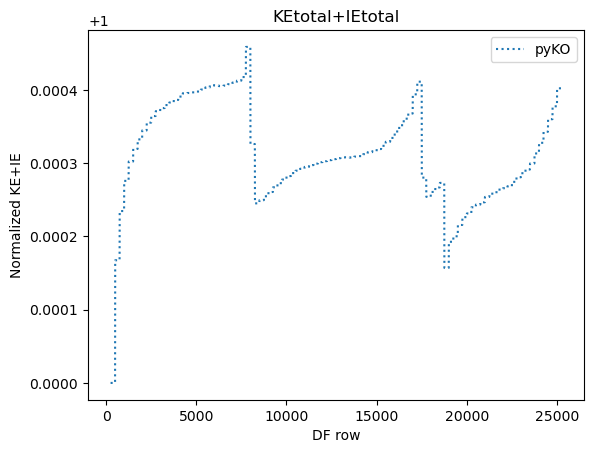

In [17]:
#istart = np.where(fko['time']>0.)[0]
#plt.plot(fko["etot"][istart]/fko["etot"][istart[0]],label='fKO')
istart = np.where(pko['time']>0.)[0]
plt.plot(pko["etot"][istart]/pko["etot"][istart[0]],':',label='pyKO')
plt.xlabel('DF row')
plt.title('KEtotal+IEtotal')
plt.ylabel('Normalized KE+IE')
plt.legend()


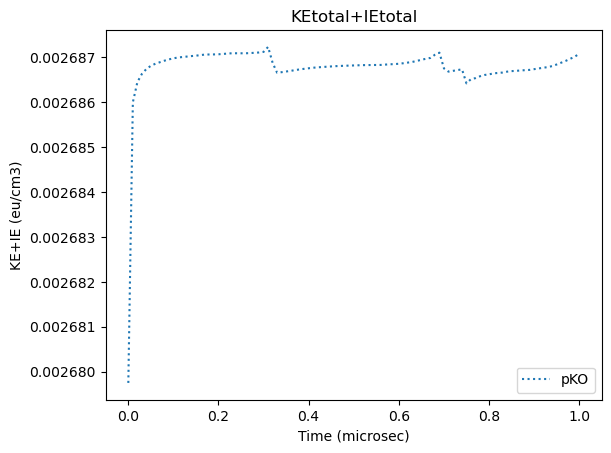

In [18]:
#plt.plot(fko['time'],fko['etot'],label='fKO')
plt.plot(pko['time'],pko['etot'],':',label='pKO')
plt.xlabel('Time (microsec)')
plt.title('KEtotal+IEtotal')
plt.ylabel('KE+IE (eu/cm3)')
#plt.ylabel('KE+IE (J/kg)')
plt.legend()


End of notebook